In [61]:
import pandas as pd

import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import nltk
from nltk import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
train = pd.read_csv("./twitter_training.csv", header=None)
validation = pd.read_csv("./twitter_validation.csv", header=None)
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
validation.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [13]:
train.columns = ["ID", "Information", "Type", "Text"]
validation.columns = ["ID", "Information", "Type", "Text"]

In [15]:
train.head()

,ID,Information,Type,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
validation.head()

,ID,Information,Type,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [19]:
train_df = train
validation_df = validation

In [23]:
train_df["Lower"] = train_df['Text'].str.lower()

In [27]:
train_df['Lower'] = [str(data) for data in train_df['Lower']]

In [35]:
train_df['Lower'] = train_df['Lower'].apply(lambda x: re.sub('[^A-Za-z0-0]+', ' ', x))

In [37]:
train_df.head()

,ID,Information,Type,Text,Lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...


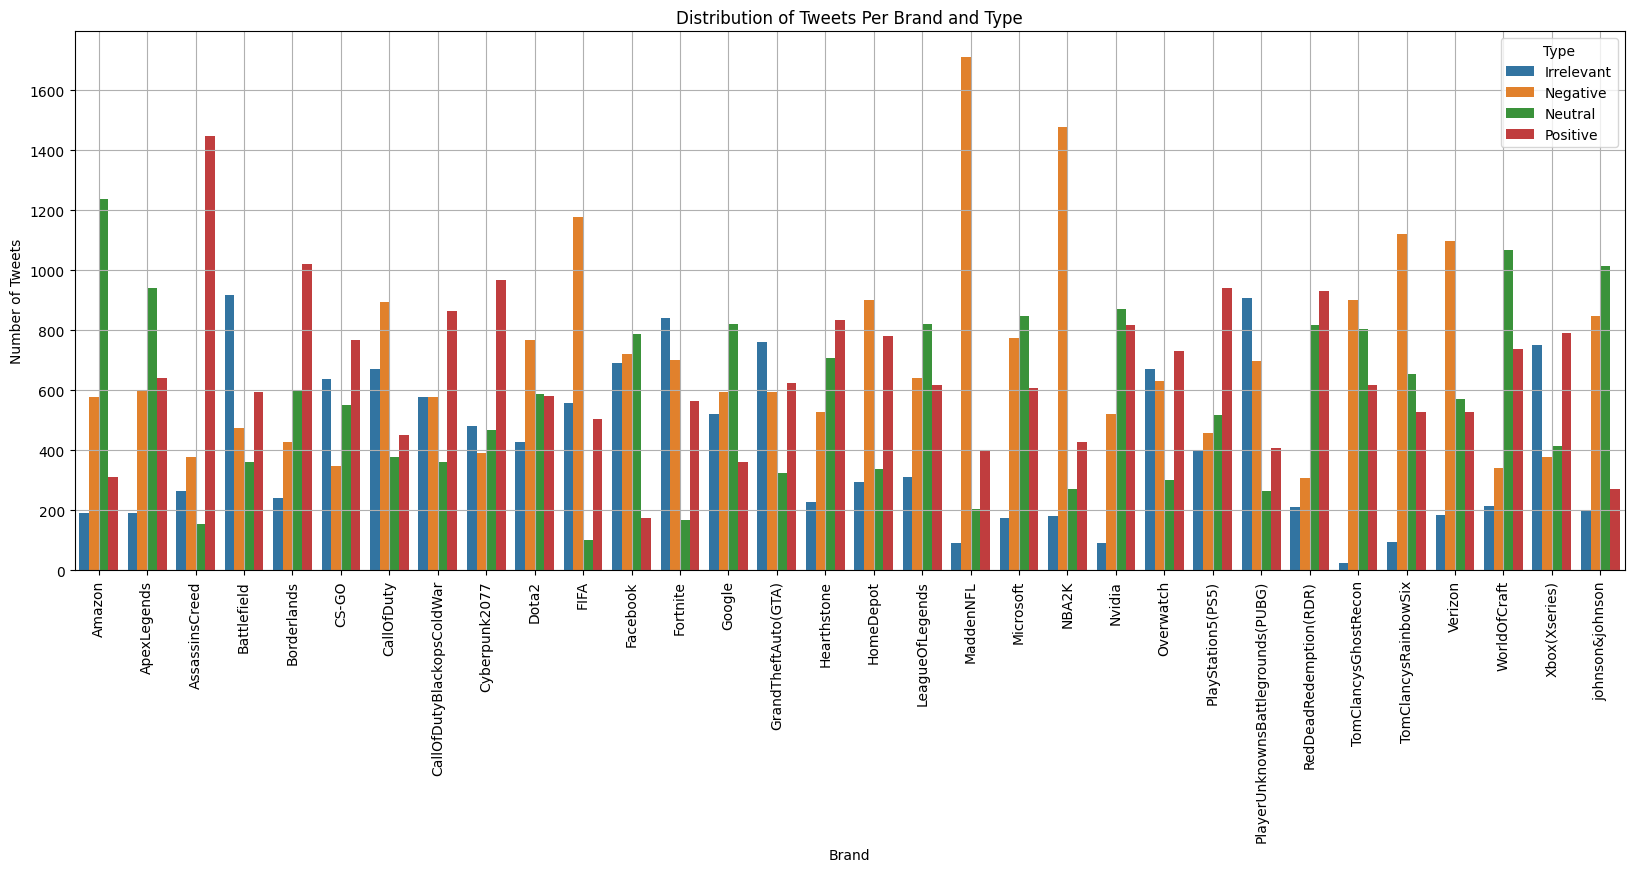

In [53]:
info_type = train_df.groupby(by=['Information', 'Type']).count().reset_index()
plt.figure(figsize=(20, 7))
sns.barplot(data=info_type, x="Information", y="ID", hue="Type")
plt.xticks(rotation=90)
plt.title("Distribution of Tweets Per Brand and Type")
plt.xlabel("Brand")
plt.ylabel("Number of Tweets")
plt.grid()
plt.show()

In [65]:
token_texts =[word_tokenize(str(word)) for word in train_df['Lower']]

In [69]:
stop_words = nltk.corpus.stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [73]:
bow_counts = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, ngram_range=(1, 1))

In [75]:
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x0000026C500687C0>)

In [77]:
reviews_train, reviews_test = train_test_split(train_df, test_size=0.2, random_state=42)

In [79]:
X_train_bow = bow_counts.fit_transform(reviews_train['Lower'])
X_test_bow = bow_counts.transform(reviews_train['Lower'])

C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [81]:
y_train_bow = reviews_train['Lower']
y_test_bow = reviews_test['Lower']

## This was taking too much time, at least 2-3 hours, and the model did not fit.

In [ ]:
log_model = LogisticRegression(C=1, solver='liblinear', max_iter=200)
log_model.fit(X_train_bow, y_train_bow)